In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict

%matplotlib inline
# size is determined by cvs file data size
plt.rcParams['figure.figsize'] = (10.0, 8.0) 
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

dataset = pd.read_csv('housing_data.csv')

dataset.columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']

print (dataset)

         CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD  TAX  \
0     0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242   
1     0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242   
2     0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222   
3     0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222   
4     0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222   
5     0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311   
6     0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311   
7     0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311   
8     0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311   
9     0.22489  12.5   7.87     0  0.524  6.377   94.3  6.3467    5  311   
10    0.11747  12.5   7.87     0  0.524  6.009   82.9  6.2267    5  311   
11    0.09378  12.5   7.87     0  0.524  5.889   39.0  5.4509    5  311   
12    0.62976   0.0   8.1

In [23]:

dataset_sec = dataset.copy()

CRIM_label, CRIM_unique = pd.factorize(dataset_sec['CRIM'],sort=True)

ZN_label, ZN_unique = pd.factorize(dataset_sec['ZN'],sort=True)

INDUS_label, INDUS_unique = pd.factorize(dataset_sec['INDUS'],sort=True)

CHAS_label, CHAS_unique = pd.factorize(dataset_sec['CHAS'],sort=True)

NOX_label, NOX_unique = pd.factorize(dataset_sec['NOX'],sort=True)
RM_label, RM_unique = pd.factorize(dataset_sec['RM'],sort=True)
AGE_label, AGE_unique = pd.factorize(dataset_sec['AGE'],sort=True)
DIS_label, DIS_unique = pd.factorize(dataset_sec['DIS'],sort=True)
RAD_label, RAD_unique = pd.factorize(dataset_sec['RAD'],sort=True)
TAX_label, TAX_unique = pd.factorize(dataset_sec['TAX'],sort=True)
PTRATIO_label, PTRATIO_unique = pd.factorize(dataset_sec['PTRATIO'],sort=True)
B_label, B_unique = pd.factorize(dataset_sec['B'],sort=True)
LSTAT_label, LSTAT_unique = pd.factorize(dataset_sec['LSTAT'],sort=True)


# Create Scalar encoded dataset for cvs fil
dataset_sec_scalar = dataset_sec.copy()
dataset_sec_scalar['ZN'] = ZN_label+1
dataset_sec_scalar['INDUS'] = INDUS_label+1
dataset_sec_scalar['CHAS'] = CHAS_label+1
dataset_sec_scalar['NOX'] = NOX_label+1
dataset_sec_scalar['RM'] = RM_label+1
dataset_sec_scalar['AGE'] = AGE_label+1
dataset_sec_scalar['DIS'] = DIS_label+1
dataset_sec_scalar['RAD'] = RAD_label+1
dataset_sec_scalar['TAX'] = TAX_label+1
dataset_sec_scalar['PTRATIO'] = PTRATIO_label+1
dataset_sec_scalar['B'] = B_label+1
dataset_sec_scalar['LSTAT'] = LSTAT_label+1


print(dataset_sec_scalar)

         CRIM  ZN  INDUS  CHAS  NOX   RM  AGE  DIS  RAD  TAX  PTRATIO    B  \
0     0.02731   1     56     1   37  280  226  333    2   12       24  357   
1     0.02729   1     56     1   37  400  160  333    2   12       24  272   
2     0.03237   1     17     1   34  383  113  361    3    6       32  312   
3     0.06905   1     17     1   34  395  140  361    3    6       32  357   
4     0.02985   1     17     1   34  283  154  361    3    6       32  303   
5     0.08829   2     58     1   50  160  179  349    5   40        9  339   
6     0.14455   2     58     1   50  212  329  358    5   40        9  357   
7     0.21124   2     58     1   50   59  356  362    5   40        9  186   
8     0.17004   2     58     1   50  157  260  376    5   40        9  187   
9     0.22489   2     58     1   50  264  314  371    5   40        9  264   
10    0.11747   2     58     1   50  159  241  366    5   40        9  357   
11    0.09378   2     58     1   50  119   90  346    5   40    

In [24]:
X=dataset_sec_scalar[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]
y=dataset_sec_scalar['MEDV']

reg = LinearRegression()

# 10-fold cross validation 
scores = cross_validate(reg, X, y, scoring='neg_mean_squared_error',
                        cv=10, return_train_score=True)
predict = cross_val_predict(reg, X, y, cv=10)

#Provide RMSE for testing and training
test_score = np.sqrt(np.mean(-scores['test_score']))
train_score = np.sqrt(np.mean(-scores['train_score']))
print('RMSE of training dataset: ', train_score)
print('RMSE of testing dataset: ', test_score)
print(-scores['test_score'])




RMSE of training dataset:  4.588620665825793
RMSE of testing dataset:  5.400456729160068
[16.91282273 15.15873438 11.18844718 48.4396455  29.87734398 29.05183243
 18.21748124 67.80322257 22.99586605 32.00393277]


In [25]:
def plotPred(test_target, pred_target):
    line1 = np.linspace(0,np.max([test_target,pred_target]),10)
    line2 = np.linspace(np.min(pred_target),np.max(pred_target),10)
    #fitted values
    plt.figure(figsize=(8,6)) 
    plt.scatter(test_target,pred_target)
    plt.plot(line1, line1,'r--')
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.show()

    # residuals
    plt.figure(figsize=(8,6))
    residual = np.array(test_target) - np.array(pred_target)
    plt.scatter(pred_target,residual)
    plt.plot(line2, np.linspace(0,0,10),'r--')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residual")
    plt.show()

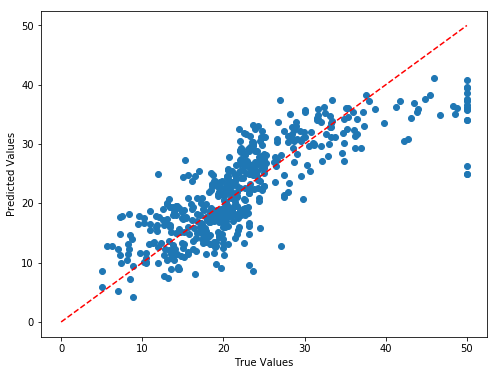

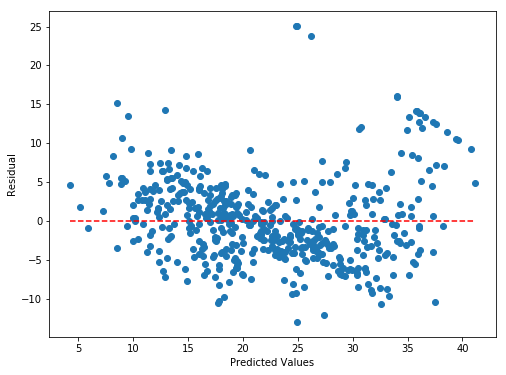

In [26]:
plotPred(y,predict)

In [27]:
#import modules
from sklearn.model_selection import KFold,GridSearchCV
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

Min Aplha: 1.8907683291966488
Min Testing Score: 5.400061641036411
Min Training Score: 4.588620665825802


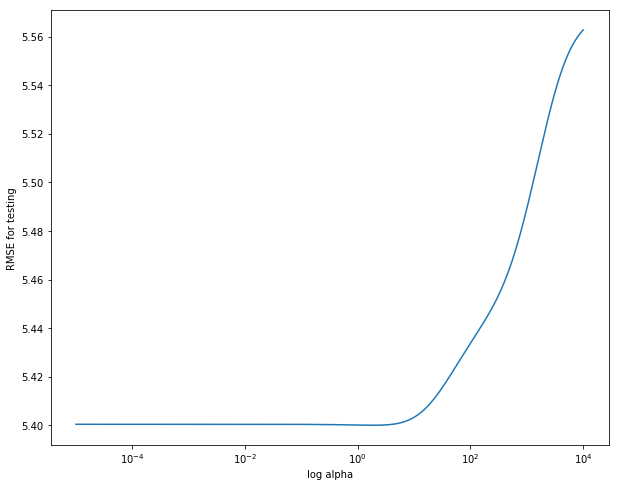

In [31]:
#provide alpha list for sweeping
alpha_list = np.logspace(-5, 4, 2000)
coefs = []
scores_ =[]
test_score_ = []
train_score_ = []
final_stat = []
for a in alpha_list:
    clf=Ridge(a,random_state =42)
    #clf.fit(X,y)
    #coefs.append(clf.coef_)
    
    scores = cross_validate(clf, X, y, scoring='neg_mean_squared_error',
                        cv=10, return_train_score=True, return_estimator=True)
    test_score = np.sqrt(np.mean(-scores['test_score']))
    train_score = np.sqrt(np.mean(-scores['train_score']))
    scores_.append(scores)
    test_score_.append(test_score)
    train_score_.append(train_score)
    final_stat.append((a,test_score))
    
final_score = 10000
for item in final_stat:
    if item[1] < final_score:
        final_score = item[1]
        min_alpha = item [0]
        
print ("Min Aplha: " + str(min_alpha))
print ("Min Testing Score: " + str(final_score))
print ("Min Training Score: " + str(min(train_score_)))


ax = plt.gca()
ax.plot(alpha_list, test_score_)
ax.set_xscale('log')
plt.xlabel('log alpha')
plt.ylabel('RMSE for testing')
plt.show()


Min Aplha: 1e-05
Min Testing Score: 5.400458324746038
Min Training Score: 4.5886206660203745


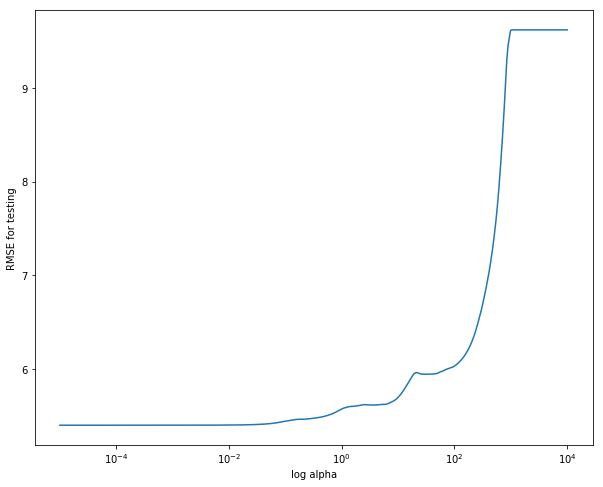

In [33]:
alpha_list = np.logspace(-5, 4, 2000)
coefs = []
scores_ =[]
test_score_ = []
train_score_ = []
final_stat =[]
for a in alpha_list:
    clf=Lasso(a,random_state =42)
    #clf.fit(X,y)
    #coefs.append(clf.coef_)
    
    # 10-fold cross validation for scalar encoding dataset
    scores = cross_validate(clf, X, y, scoring='neg_mean_squared_error',
                        cv=10, return_train_score=True, return_estimator=True)
    test_score = np.sqrt(np.mean(-scores['test_score']))
    train_score = np.sqrt(np.mean(-scores['train_score']))
    scores_.append(scores)
    test_score_.append(test_score)
    train_score_.append(train_score)
    final_stat.append((a,test_score))
    
final_score = 10000
for item in final_stat:
    if item[1] < final_score:
        final_score = item[1]
        min_alpha = item [0]
        
print ("Min Aplha: " + str(min_alpha))
print ("Min Testing Score: " + str(final_score))
print ("Min Training Score: " + str(min(train_score_)))

ax = plt.gca()
ax.plot(alpha_list, test_score_)
ax.set_xscale('log')
plt.xlabel('log alpha')
plt.ylabel('RMSE for testing')
plt.show()


5.40008677854026
4.588620666034991


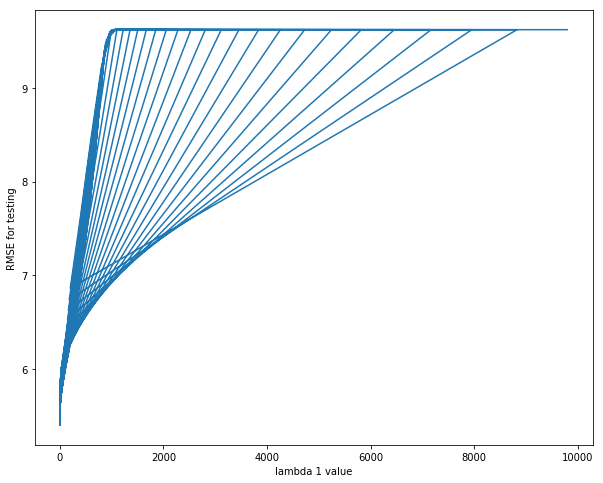

0.00419870708444391
0.02
5.40008677854026
8.397414168887819e-05
0.0041147329427550314


In [34]:
alpha_list = np.logspace(-5, 4, 200)
ratio_list = np.arange(0.02,.99,0.02)
coefs = []
scores_ =[]
test_score_ = []
train_score_ = []
total_relation=[]
lambda_1_=[]
for a in alpha_list:
    for r in ratio_list:
        lambda_1_.append(a*r)
        clf=ElasticNet(a,random_state =42, l1_ratio=r) #加上ratio，求出最小test_score, 算出 alpha,lambda1,2，
        #clf.fit(X,y)
        #coefs.append(clf.coef_)

        # 10-fold cross validation for scalar encoding dataset
        scores = cross_validate(clf, X, y, scoring='neg_mean_squared_error',
                            cv=10, return_train_score=True, return_estimator=True)
        test_score = np.sqrt(np.mean(-scores['test_score']))
        train_score = np.sqrt(np.mean(-scores['train_score']))
        scores_.append(scores)
        test_score_.append(test_score)
        train_score_.append(train_score)
        total_relation.append((a,r,test_score))

print (min(test_score_))
print (min(train_score_))

ax = plt.gca()
ax.plot(lambda_1_, test_score_)
#ax.set_xscale('log')
plt.xlabel('lambda 1 value')
plt.ylabel('RMSE for testing')
plt.show()

final_score = 10000
for item in total_relation:
    if item[2] < final_score:
        final_score = item[2]
        alpha_value = item[0]
        ratio_value = item[1]

lambda_1 = alpha_value * ratio_value
lambda_2 = alpha_value * (1-ratio_value)

print (alpha_value)
print (ratio_value)
print (final_score)
print (lambda_1)
print (lambda_2)
#print (alpha_list)

In [35]:
final_score = 10000
for item in total_relation:
    if item[2] < final_score:
        final_score = item[2]
        alpha_value = item[0]
        ratio_value = item[1]

lambda_1 = alpha_value * ratio_value
lambda_2 = alpha_value * (1-ratio_value)

print (alpha_value)
print (ratio_value)
print (final_score)
print (lambda_1)
print (lambda_2)

print (test_score_)

0.00419870708444391
0.02
5.40008677854026
8.397414168887819e-05
0.0041147329427550314
[5.400454758001713, 5.400454831905235, 5.4004549047592105, 5.4004549770905514, 5.400455049703489, 5.400455122413364, 5.400455195025224, 5.4004552677492486, 5.400455340439259, 5.400455413294886, 5.400455486089169, 5.400455559506991, 5.4004556322847295, 5.40045570438994, 5.400455777124642, 5.400455849860871, 5.400455923061545, 5.400455995690267, 5.4004560680479194, 5.400456140790248, 5.40045621357939, 5.400456286284872, 5.400456359031777, 5.400456431816728, 5.4004565040918004, 5.400456576843281, 5.400456649596287, 5.400456722350818, 5.400456795022353, 5.4004568709008245, 5.400456943084566, 5.400457015845198, 5.4004570886073555, 5.4004571613286405, 5.4004572340938495, 5.4004573068605835, 5.400457379628844, 5.4004574523040505, 5.400457524392497, 5.400457597165335, 5.400457669890065, 5.400457742665953, 5.400457815443369, 5.400457888222308, 5.400457961002776, 5.400458033784769, 5.400458106568288, 5.40045817

In [36]:
ratio_list = np.arange(0.02,.99,0.02)
print (ratio_list)

[0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26 0.28
 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54 0.56
 0.58 0.6  0.62 0.64 0.66 0.68 0.7  0.72 0.74 0.76 0.78 0.8  0.82 0.84
 0.86 0.88 0.9  0.92 0.94 0.96 0.98]
